# Convolutional Neural Network (CNN)

In [4]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Download and prepare the CIFAR10 dataset

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## Verify the data

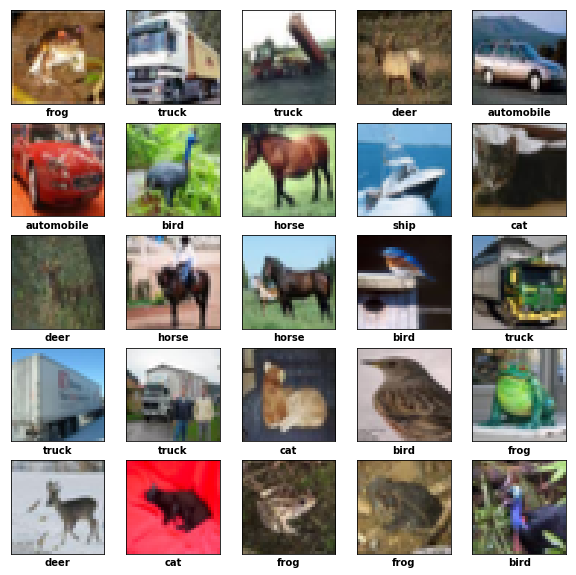

In [9]:
# plot 25 images展示

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Create the convolutional base

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to our first layer.

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


## Add Dense layers on top

To complete our model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs and a softmax activation.

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

## Compile and train the model

In [22]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=10,
                   validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 43s 863us/sample - loss: 0.6438 - accuracy: 0.7725 - val_loss: 0.8859 - val_accuracy: 0.6970
Epoch 2/10
50000/50000 [==============================] - 43s 870us/sample - loss: 0.6144 - accuracy: 0.7850 - val_loss: 0.9362 - val_accuracy: 0.6957
Epoch 3/10
50000/50000 [==============================] - 42s 847us/sample - loss: 0.5907 - accuracy: 0.7920 - val_loss: 0.8857 - val_accuracy: 0.7076
Epoch 4/10
50000/50000 [==============================] - 43s 865us/sample - loss: 0.5648 - accuracy: 0.8004 - val_loss: 0.8974 - val_accuracy: 0.7096
Epoch 5/10
50000/50000 [==============================] - 43s 860us/sample - loss: 0.5385 - accuracy: 0.8089 - val_loss: 0.9426 - val_accuracy: 0.7049
Epoch 6/10
50000/50000 [==============================] - 45s 900us/sample - loss: 0.5198 - accuracy: 0.8165 - val_loss: 0.9863 - val_accuracy: 0.6921
Epoch 7/10
50000/50000 [====================

## Evaluate the model

10000/10000 - 2s - loss: 1.0655 - accuracy: 0.6969


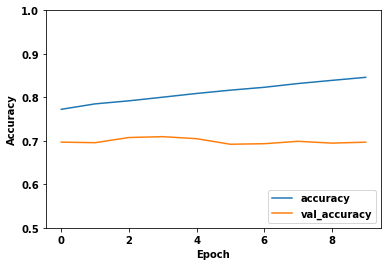

In [23]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5,1])
plt.legend(loc="lower right")

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Image Classification

This tutorial shows how to classify cats or dogs from images. It builds an image classifier using a tf.keras.Sequential model and load data using tf.keras.preprocessing.image.ImageDataGenerator. You will get some practical experience and develop intuition for the following concepts:
+ Building data input pipelines using the tf.keras.preprocessing.image.ImageDataGenerator class to efficiently work with data on disk to use with the model.
+ Overfitting —How to identify and prevent it.
+ Data augmentation and dropout —Key techniques to fight overfitting in computer vision tasks to incorporate into the data pipeline and image classifier model.

基本步骤如下：
+ Examine and understand data
+ Build an input pipeline
+ Build the model
+ Train the model
+ Test the model
+ Improve the model and repeat the process

In [24]:
import tensorflow as tf

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

## Load Data

Begin by downloading the dataset. This tutorial uses a filtered version of Dogs vs Cats dataset from Kaggle. Download the archive version of the dataset and store it in the "/tmp/" directory.

In [28]:
_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

path_to_zip = tf.keras.utils.get_file("cat_and_dogs.zip", origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), "cats_and_dogs_filtered.zip")

After extracting its contents, assign variables with the proper file path for the training and validation set.

In [83]:
PATH = "G:\桌面\cats_and_dogs_filtered"
train_dir = os.path.join(PATH, "train")
validation_dir = os.path.join(PATH, "validation")
train_dir, validation_dir

('G:\\桌面\\cats_and_dogs_filtered\\train',
 'G:\\桌面\\cats_and_dogs_filtered\\validation')

In [61]:
train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")
validation_cats_dir = os.path.join(validation_dir, "cats")
validation_dogs_dir = os.path.join(validation_dir, "dogs")

# print(train_cats_dir)
# print(train_dogs_dir)
# print(validation_cats_dir)
# print(validation_dogs_dir)

Understand the data

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

For convenience, set up variables to use while pre-processing the dataset and training the network.

In [49]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

## Data preparation

Format the images into appropriately pre-processed floating point tensors before feeding to the network:

1. Read images from the disk.
2. Decode contents of these images and convert it into proper grid format as per their RGB content.
3. Convert them into floating point tensors.
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

Fortunately, all these tasks can be done with the ImageDataGenerator class provided by tf.keras. It can read images from disk and preprocess them into proper tensors. It will also set up generators that convert these images into batches of tensors—helpful when training the network.

In [51]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

After defining the generators for training and validation images, the flow_from_directory method load images from the disk, applies rescaling, and resizes the images into the required dimensions.

In [84]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode ="binary"
)

Found 2000 images belonging to 2 classes.


In [86]:
val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode = "binary"
)

Found 1000 images belonging to 2 classes.


Visualize training images

Visualize the training images by extracting a batch of images from the training generator—which is 32 images in this example—then plot five of them with matplotlib.

In [89]:
sample_training_images, _ = next(train_data_gen)
sample_training_images.shape

(128, 150, 150, 3)

The next function returns a batch from the dataset. The return value of next function is in form of (x_train, y_train) where x_train is training features and y_train, its labels. Discard the labels to only visualize the training images.

In [90]:
#  This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImage(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

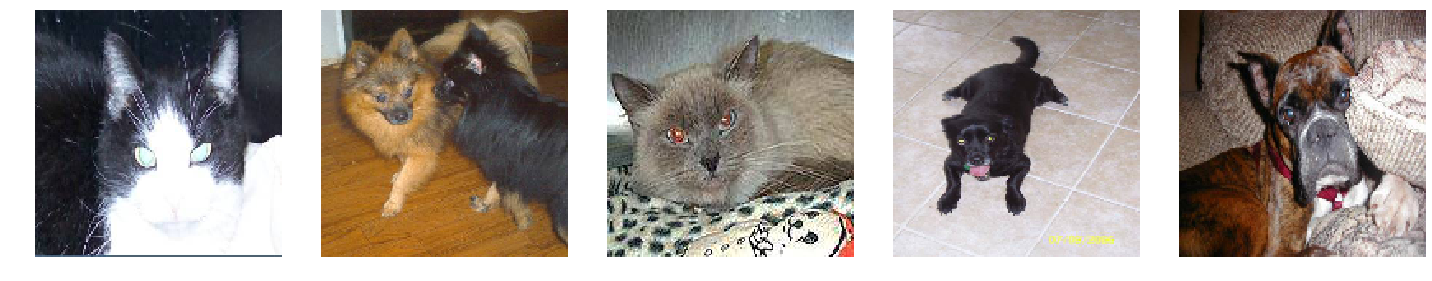

In [91]:
plotImage(sample_training_images[:5])

## Create the model

The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 512 units on top of it that is activated by a relu activation function.

In [94]:
model = Sequential([
    Conv2D(16, 3, padding="same", activation="relu", input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPooling2D(), # 默认（2,2）
    Conv2D(32, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(64, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(1)
])

## Compile the model

For this tutorial, choose the ADAM optimizer and binary cross entropy loss function. To view training and validation accuracy for each training epoch, pass the metrics argument.

In [95]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

## Train the model

Use the fit_generator method of the ImageDataGenerator class to train the network.

In [97]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=2000 // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=1000 // batch_size
)

W0618 18:06:47.934627  6336 deprecation.py:323] From <ipython-input-97-f075eeac7d2f>:6: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.
W0618 18:06:48.339465  6336 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
W0618 18:06:48.791726  6336 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 30s 2s/step - loss: 0.9210 - accuracy: 0.5262 - val_loss: 0.6770 - val_accuracy: 0.5357
Epoch 2/15
15/15 [==============================] - 29s 2s/step - loss: 0.6707 - accuracy: 0.5443 - val_loss: 0.6481 - val_accuracy: 0.6496
Epoch 3/15
15/15 [==============================] - 29s 2s/step - loss: 0.6401 - accuracy: 0.5956 - val_loss: 0.6164 - val_accuracy: 0.6105
Epoch 4/15
15/15 [==============================] - 28s 2s/step - loss: 0.5951 - accuracy: 0.6335 - val_loss: 0.6024 - val_accuracy: 0.6161
Epoch 5/15
15/15 [==============================] - 29s 2s/step - loss: 0.5342 - accuracy: 0.6960 - val_loss: 0.5985 - val_accuracy: 0.6328
Epoch 6/15
15/15 [==============================] - 29s 2s/step - loss: 0.4916 - accuracy: 0.7420 - val_loss: 0.5536 - val_accuracy: 0.7109
Epoch 7/15
15/15 [==============================] - 28s 2s/step - loss: 0.4637 - accuracy: 0.7495 - val_loss: 0.6981 - 

Visualize training results

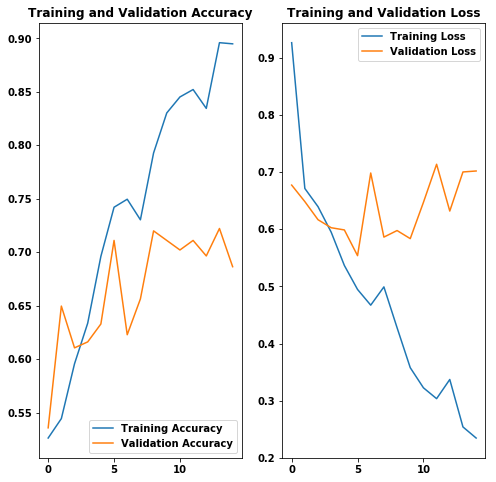

In [98]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

## Overfitting

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 70% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use data augmentation and add dropout to our model.

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. One way to fix this problem is to augment the dataset so that it has a sufficient number of training examples. Data augmentation takes the approach of generating more training data from existing training samples by augmenting the samples using random transformations that yield believable-looking images. The goal is the model will never see the exact same picture twice during training. This helps expose the model to more aspects of the data and generalize better.

Implement this in tf.keras using the ImageDataGenerator class. Pass different transformations to the dataset and it will take care of applying it during the training process.

horizontal flip (水平翻转)

In [99]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [100]:
train_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH)
)

Found 2000 images belonging to 2 classes.


Take one sample image from the training examples and repeat it five times so that the augmentation is applied to the same image five times.

In [102]:
train_data_gen

In [105]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

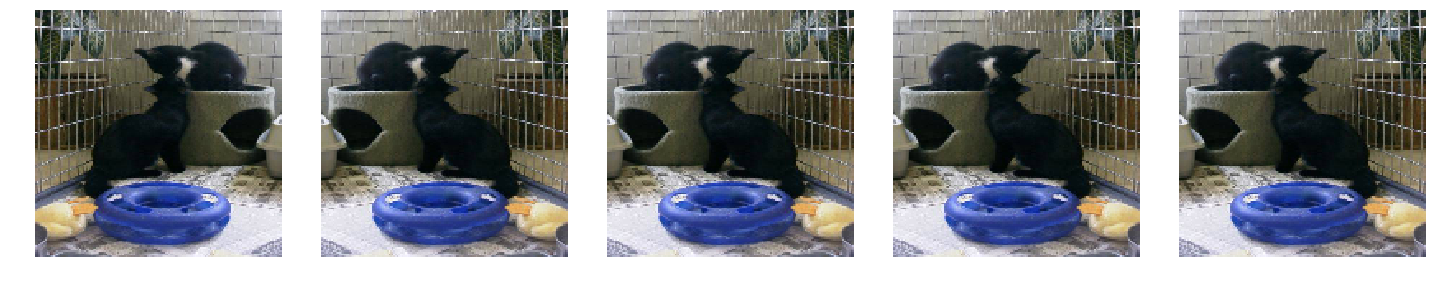

In [106]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImage(augmented_images)

Randomly rotate the image(任意旋转图片)

Let's take a look at a different augmentation called rotation and apply 45 degrees of rotation randomly to the training examples.

In [111]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [112]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


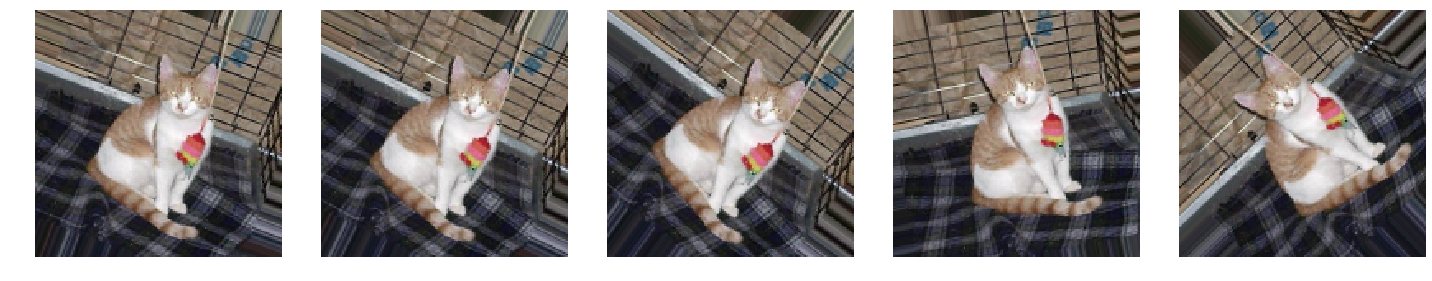

In [113]:
plotImage(augmented_images)

zoom augmentation(扩大聚焦)

Apply a zoom augmentation to the dataset to zoom images up to 50% randomly.

In [114]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [115]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


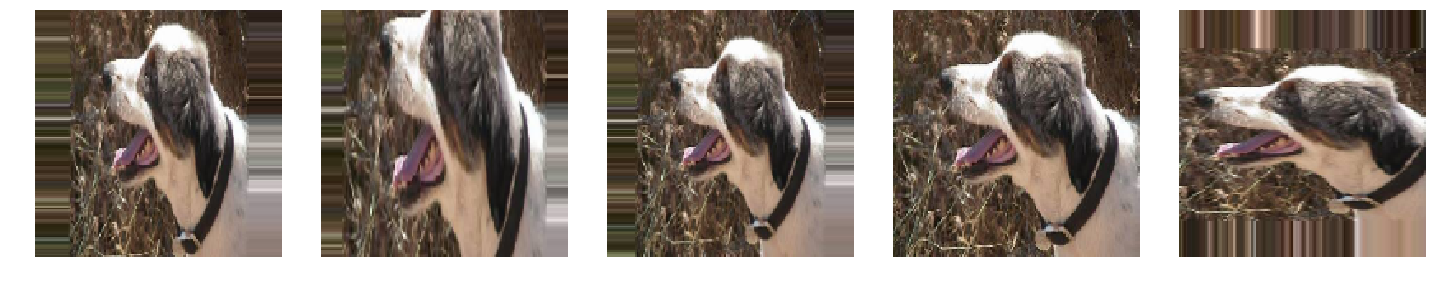

In [116]:
plotImage(augmented_images)

Put it all together(整合到一起)

Apply all the previous augmentations. Here, you applied rescale, 45 degree rotation, width shift, height shift, horizontal flip and zoom augmentation to the training images.

In [129]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5
)

In [130]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


Visualize how a single image would look five different times when passing these augmentations randomly to the dataset.

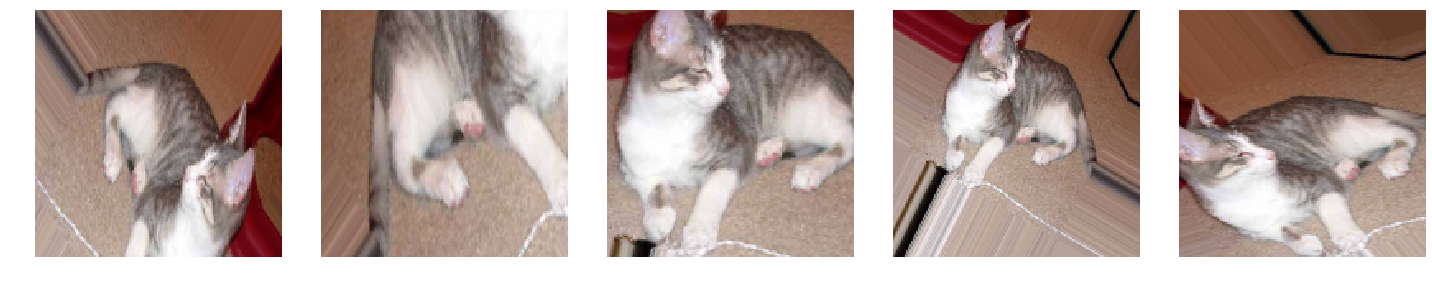

In [120]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImage(augmented_images)

Create validation data generator

Generally, only apply data augmentation to the training examples. In this case, only rescale the validation images and convert them into batches using ImageDataGenerator.

In [131]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [132]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


## Dropout

Another technique to reduce overfitting is to introduce dropout to the network. It is a form of regularization that forces the weights in the network to take only small values, which makes the distribution of weight values more regular and the network can reduce overfitting on small training examples. Dropout is one of the regularization technique used in this tutorial

When you apply dropout to a layer it randomly drops out (set to zero) number of output units from the applied layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

When appling 0.1 dropout to a certain layer, it randomly kills 10% of the output units in each training epoch.

Create a network architecture with this new dropout feature and apply it to different convolutions and fully-connected layers.

1. Creating a new network with Dropouts

Here, you apply dropout to first and last max pool layers. Applying dropout will randomly set 20% of the neurons to zero during each training epoch. This helps to avoid overfitting on the training dataset.

In [133]:
model_new = Sequential([
    Conv2D(16, 3, padding="same", activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(64, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(1)
])

2. Compile the model

In [134]:
model_new.compile(optimizer="adam",
                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 metrics=["accuracy"])

model_new.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 18, 18, 64)       

3. Train the model

After successfully introducing data augmentations to the training examples and adding dropouts to the network, train this new network:

In [127]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=2000 // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=1000 / batch_size
)

W0618 19:06:19.468062  6336 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
W0618 19:06:19.737906  6336 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 15 steps, validate for 7.8125 steps
Epoch 1/15
15/15 [==============================] - 35s 2s/step - loss: 1.3222 - accuracy: 0.4979 - val_loss: 0.7098 - val_accuracy: 0.5000
Epoch 2/15
15/15 [==============================] - 34s 2s/step - loss: 0.6931 - accuracy: 0.4984 - val_loss: 0.7089 - val_accuracy: 0.5000
Epoch 3/15
15/15 [==============================] - 35s 2s/step - loss: 0.6924 - accuracy: 0.5005 - val_loss: 0.7094 - val_accuracy: 0.5000
Epoch 4/15
15/15 [==============================] - 34s 2s/step - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.7044 - val_accuracy: 0.5000
Epoch 5/15
15/15 [==============================] - 34s 2s/step - loss: 0.6903 - accuracy: 0.4995 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 6/15
15/15 [==============================] - 34s 2s/step - loss: 0.6819 - accuracy: 0.5053 - val_loss: 0.6850 - val_accuracy: 0.5010
Epoch 7/15
15/15 [==============================] - 36s 2s/step - loss: 0.6755 - accuracy: 0.5246 - val_loss: 0.71

Visualize the model

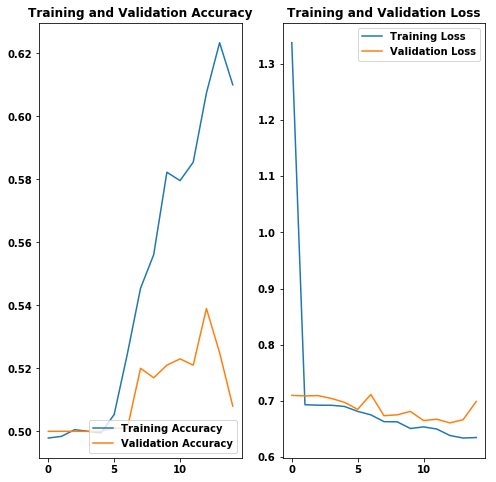

In [135]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()